# Seaborn Objects

Seaborn fue introducido hace varios años, como una alternativa al paquete de gráficas estándar Matplotlib.  En realidad no es una alternativa ya que fue construído sobre Matplotlib.

Las características básicas son:
* una buena variedad de gráficas
* una sintáxis mucho más fácil que la de Matplolib

### Pero el Seaborn tiene limitaciones:

* es un reto crear visualizaciones avanzadas
* si se necesitaba crear una gráfica multicapas, con múltiples bases de datos...era un dolor
* mucho del formateo para las gráficas en Seaborn, debían hacerse con el mismo Matplotlib

En pocas palabras Seaborn era bueno para crear gráficas simples e intermedias, pero para gráficas más avanzadas parecía llegar a un límite.

## El sistema de objetos Seaborn

Es una nueva forma de crear visualizaciones de datos en Python.  Este nuevo sistema salió en Septiembre del 2022 con la versión v.012 del paquete.

Se ha convertido en un "toolkit" poderoso de visualización, simple y flexible

Este sistema funciona muy bien, en forma nativa con los DataFrames.  Muchos de los paquetes de visualización en Python no lo son, incluso Matplotlib tiene algunas funciones que no "funcionan" con DataFrames, requiriendo que uno tenga que escribir código para hacer iteraciones, etc

El sistema de objetos de Seaborn es modular.  Se crean las gráficas por medio de llamadas a funciones y métodos y armarlos todos como "trozos de madera".  Así que en vez de llamar a una función "scatterplot", se llama a una función generalizada de "plot" y luego se le dice que se agreguen puntos "dots" a la gráfica.

Siendo un poco más técnicos, este sistema se basa en la gramática de gráficas **Grammar of Graphics** que ha influenciado tanto a otras herramientas poderosas como ggplot2 y Tableau.

## Una sintáxis de alto nivel

La sintáxis funciona en una forma modular.

En vez de tener una función para gráficas de dispersión, una para gráficas de barras, otra para gráficas de líneas, etc., el sistema tiene bloques de "construcción" pequeños que se pueden juntar de diferentes formas para crear visualizaciones diferentes.

A un nivel alto, sintácticamente, hay algunas partes que se verán en casí todas las visualizaciones:

* la función *Plot*
* el método *add*
* una función que agrega marcas a una gráfica

(so.Plot(data = , x = , y = )
   .add(...)
)

El método *.add* agrega una capa a la gráfica

Hay otras partes de la sintáxis de los Objetos de Seaborn como:
* el método *facet()*
* el método *scale()*
* el método *theme()*
* etc.

Pero para este tutorial nos quedaremos con lo simple.

Técnicamente se puede invocar a la función so.Plot() por sí sola

In [1]:
import seaborn as sns
import seaborn.objects as so
import pandas as pd

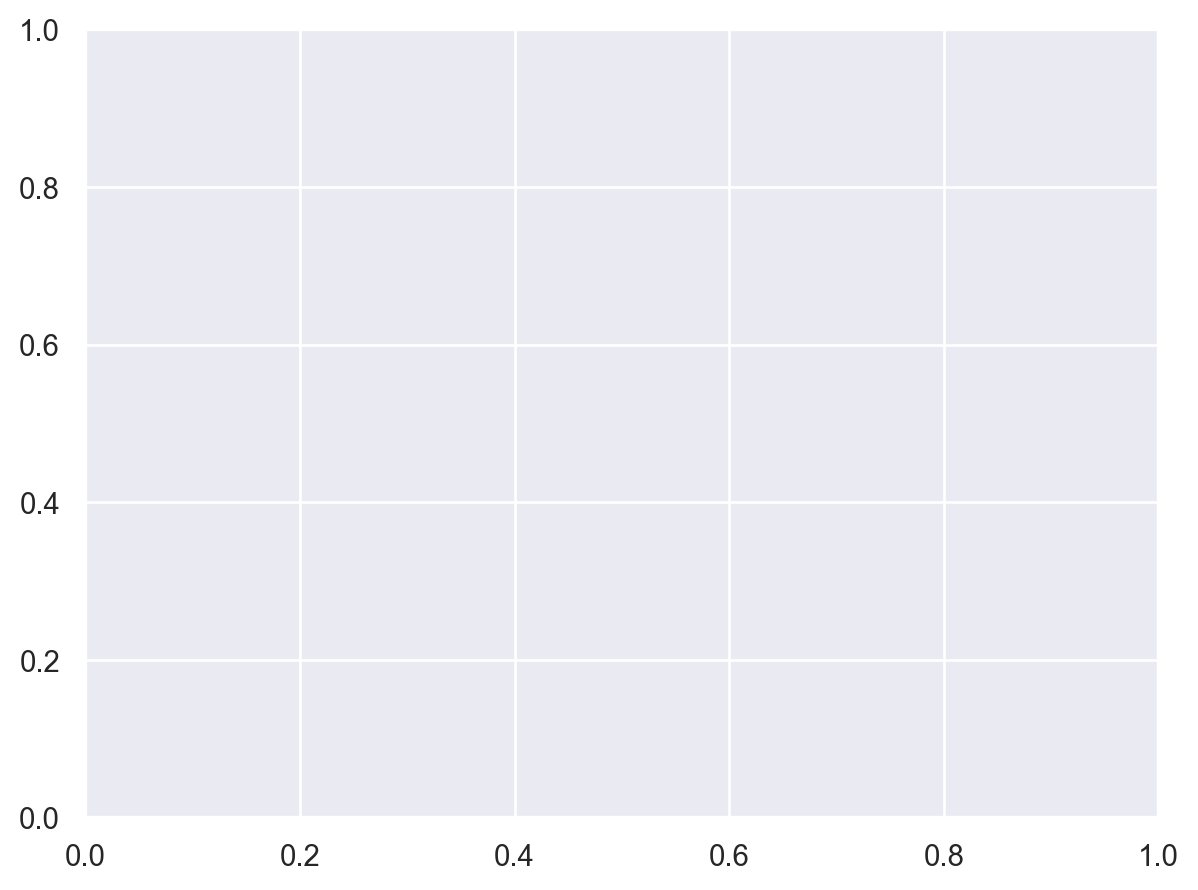

In [2]:
so.Plot()

Vemos que solo salió una gráfica vacía.  Esta función debe usarse siempre

In [3]:
carros = pd.read_csv("supercars.csv")

In [4]:
carros.head()

,Unnamed: 0,model,make,year,decade,horsepower,torque,seconds_0_60,engine_size,top_speed,weight
0,0,Bugatti Veyron 8.0 litre W16 Super Sport,Bugatti,2010,2010s,1184,NaN,2.5,487.7,258.0,1.838224
1,1,Bugatti Veyron 16.4 Grand Sport Vitesse,Bugatti,2012,2010s,1184,1106.0,2.5,487.7,255.0,1.990250
2,2,SSC Ultimate Aero TT,SSC,2008,2000s,1183,1094.0,2.8,387.3,273.0,1.250000
3,3,Koenigsegg Agera R 5.0 V8,Koenigsegg,2012,2010s,1124,885.0,2.9,307.0,273.0,1.415082
4,4,Porsche 9FF GT9R,Porsche,2009,2000s,1120,774.0,2.9,244.0,256.0,1.346154


Una gráfica de dispersión simple

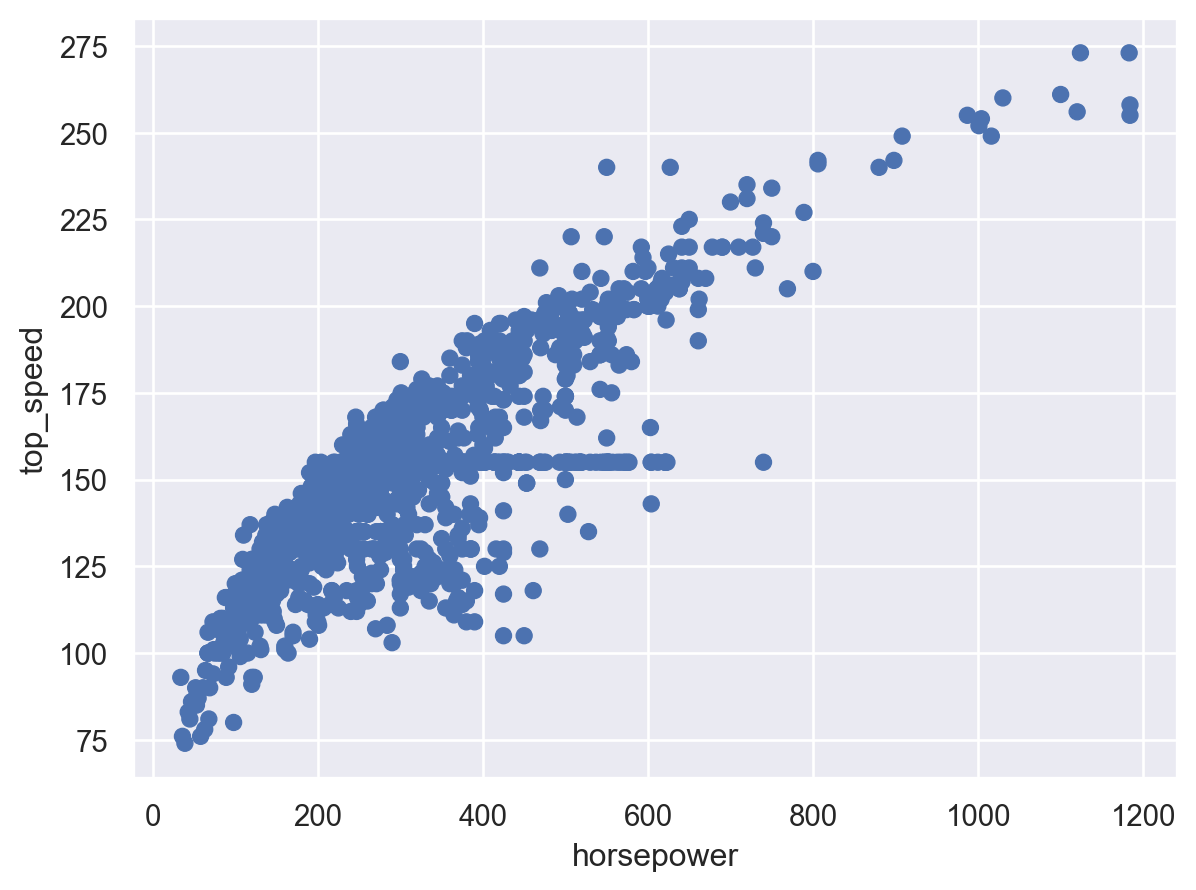

In [5]:
(so.Plot(data = carros
         , x = "horsepower"
         , y = "top_speed"
        )
     .add(so.Dot())
)

Ejemplo de gráfica de líneas

In [6]:
bolsa_val = pd.read_csv("amzn_goog_stocks.csv")
bolsa_val.head()

,Unnamed: 0,date,open,high,low,close,adj_close,volume,stock
0,0,2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600,amzn
1,1,2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400,amzn
2,2,2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400,amzn
3,3,2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000,amzn
4,4,2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400,amzn


In [7]:
bolsa_val.date = pd.to_datetime(bolsa_val.date)
amazon = bolsa_val.query("stock == 'amzn'")
amazon.head()

,Unnamed: 0,date,open,high,low,close,adj_close,volume,stock
0,0,2000-01-03,81.5000,89.5625,79.046875,89.3750,89.3750,16117600,amzn
1,1,2000-01-04,85.3750,91.5000,81.750000,81.9375,81.9375,17487400,amzn
2,2,2000-01-05,70.5000,75.1250,68.000000,69.7500,69.7500,38457400,amzn
3,3,2000-01-06,71.3125,72.6875,64.000000,65.5625,65.5625,18752000,amzn
4,4,2000-01-07,67.0000,70.5000,66.187500,69.5625,69.5625,10505400,amzn


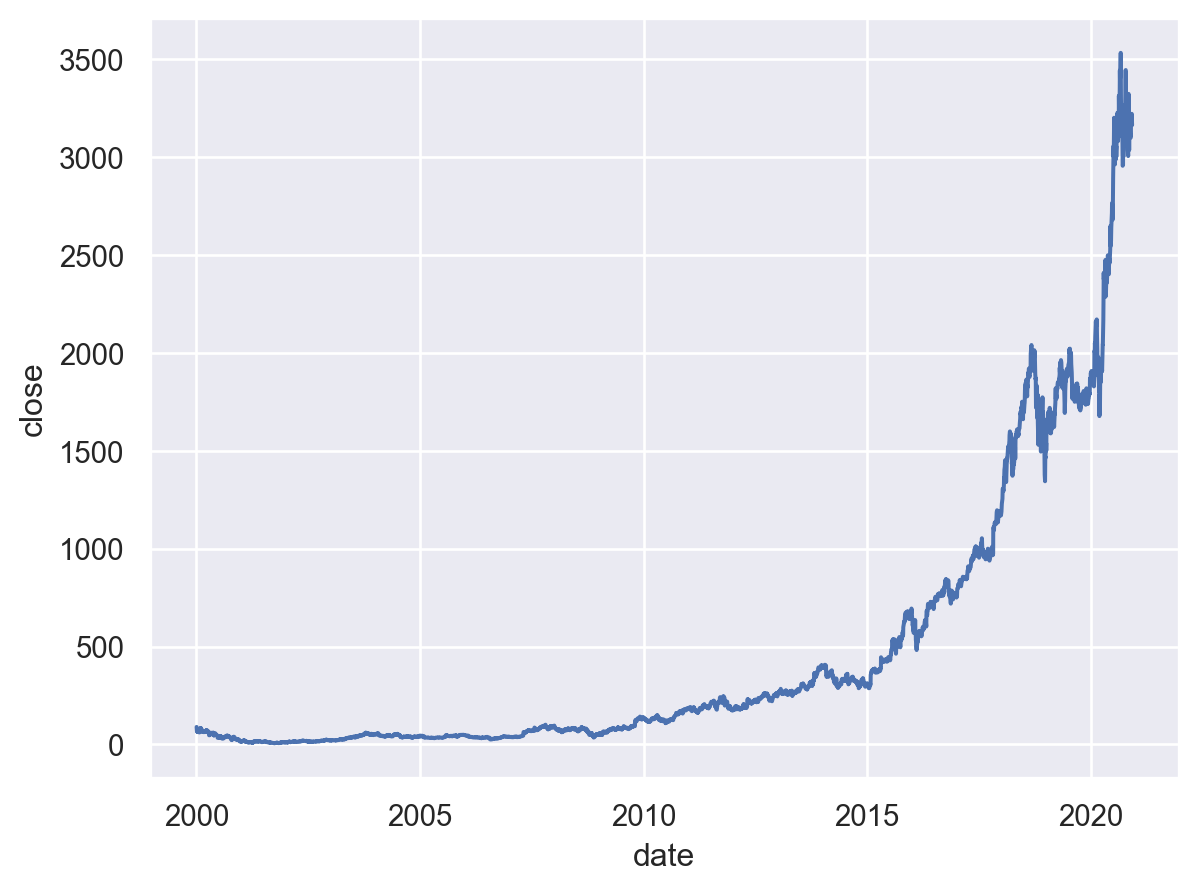

In [8]:
(so.Plot(data = amazon
         , x = 'date'
         , y = 'close'
        )
 .add(so.Line())
)

Ahora cambiemos el color de la línea

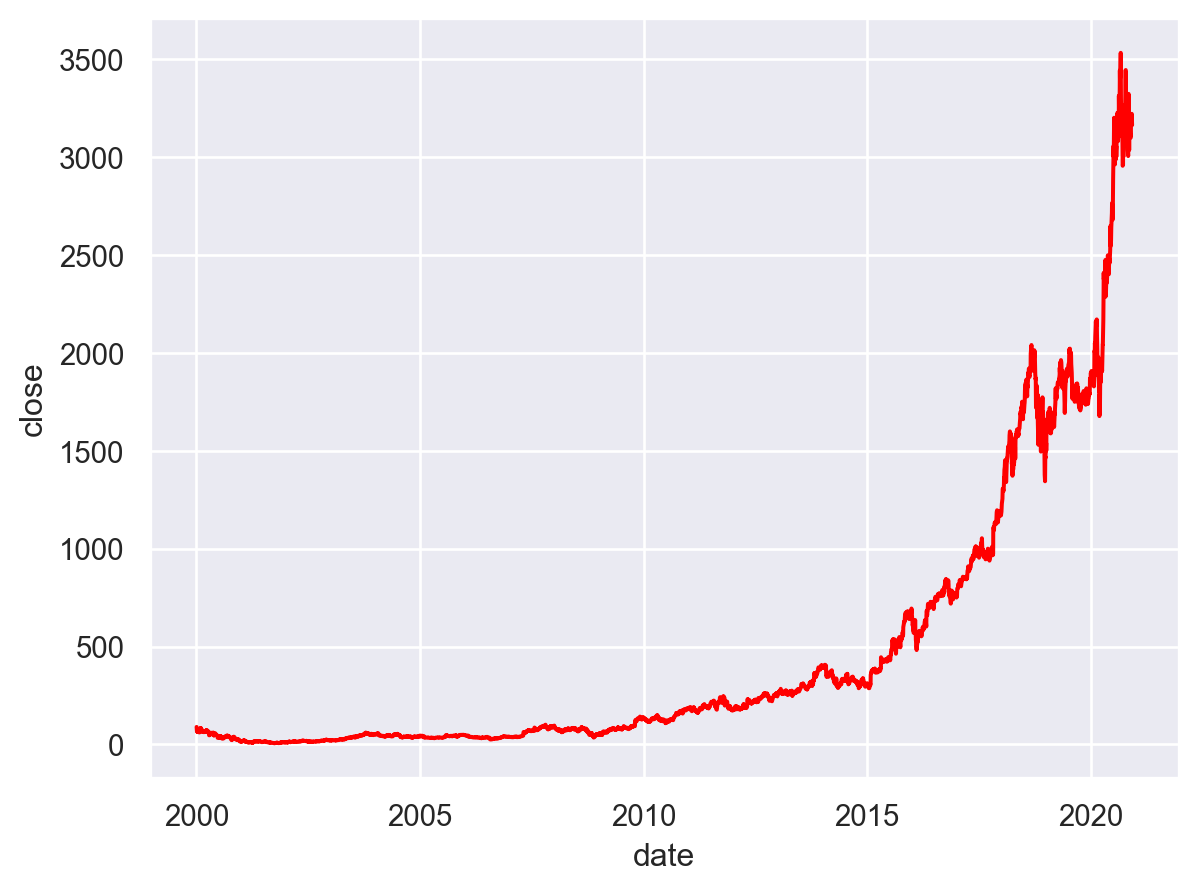

In [9]:
(so.Plot(data = amazon
         , x = 'date'
         , y = 'close'
         )
     .add(so.Line(color = 'red'))
)

Y finalmente grafiquemos los dos valores

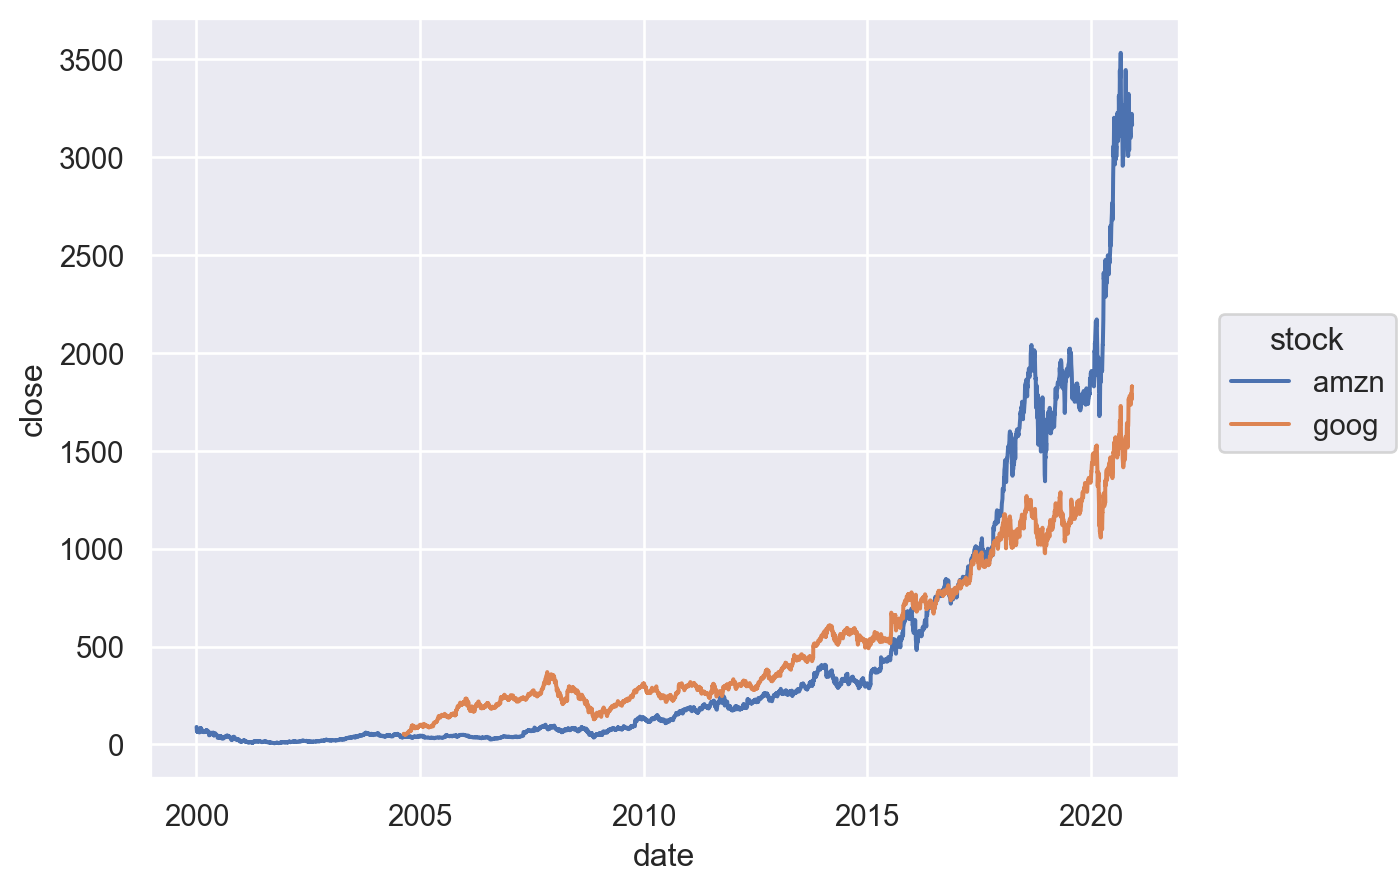

In [10]:
(so.Plot(data = bolsa_val
         , x = 'date'
         , y = 'close'
         , color = 'stock'
        )
 .add(so.Line())
)

Ahora una gráfica de barras

In [11]:
banco = pd.read_csv('bank.csv')
banco.head()

,age,job,marital,education,balance,mortgage,loan,concact_channel,campaign_contacts,previous_contacts,previous_outcome,subscribed
0,30,unemployed,married,primary,1787,no,no,cellular,1,0,unknown,no
1,33,services,married,secondary,4789,yes,yes,cellular,1,4,failure,no
2,35,management,single,tertiary,1350,yes,no,cellular,1,1,failure,no
3,30,management,married,tertiary,1476,yes,yes,unknown,4,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,no,unknown,1,0,unknown,no


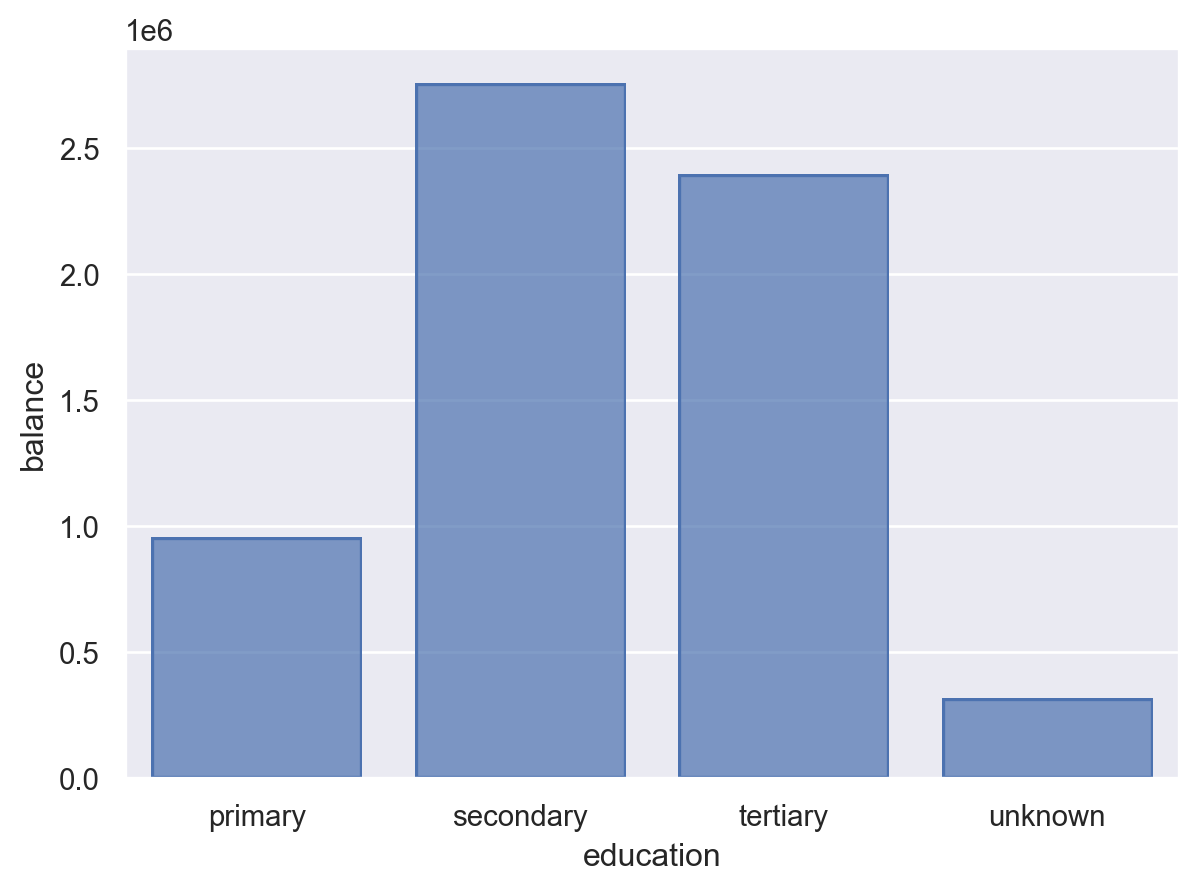

In [12]:
(so.Plot(data = banco
         , x = 'education'
         , y = 'balance'
        )
    .add(so.Bar(), so.Agg(func = sum))
)

In [13]:
banco.groupby("education").describe()

age                                                     balance  \
            count       mean        std   min   25%   50%   75%   max   count   
education                                                                       
primary     678.0  46.833333  11.200085  19.0  39.0  46.0  55.0  87.0   678.0   
secondary  2306.0  40.062446  10.226439  19.0  32.0  38.0  47.0  86.0  2306.0   
tertiary   1350.0  39.645926   9.612536  22.0  32.0  37.0  46.0  78.0  1350.0   
unknown     187.0  45.299465  11.373718  19.0  37.0  47.0  54.0  79.0   187.0   

                        ... campaign_contacts       previous_contacts  \
                  mean  ...               75%   max             count   
education               ...                                             
primary    1411.544248  ...               3.0  44.0             678.0   
secondary  1196.814397  ...               3.0  50.0            2306.0   
tertiary   1775.423704  ...               3.0  32.0            1350.0   
unknown    1701.245989  ...               3.0  18.0             187.0   

                                                         
               mean       std  min  25%  50%  75%   max  
education                                                
primary    0.460177  1.857726  0.0  0.0  0.0  0.0  24.0  
secondary  0.528621  1.599432  0.0  0.0  0.0  0.0  25.0  
tertiary   0.612593  1.787525  0.0  0.0  0.0  0.0  22.0  
unknown    0.508021  1.482402  0.0  0.0  0.0  0.0  13.0  

[4 rows x 32 columns]

In [14]:
propinas = sns.load_dataset("tips")
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Se pueden crear graficas más complejas invocando a **Plot.add()** repetidamente. Cada vez que se invoca, define una capa en la gráfica.  Por ejemplo:

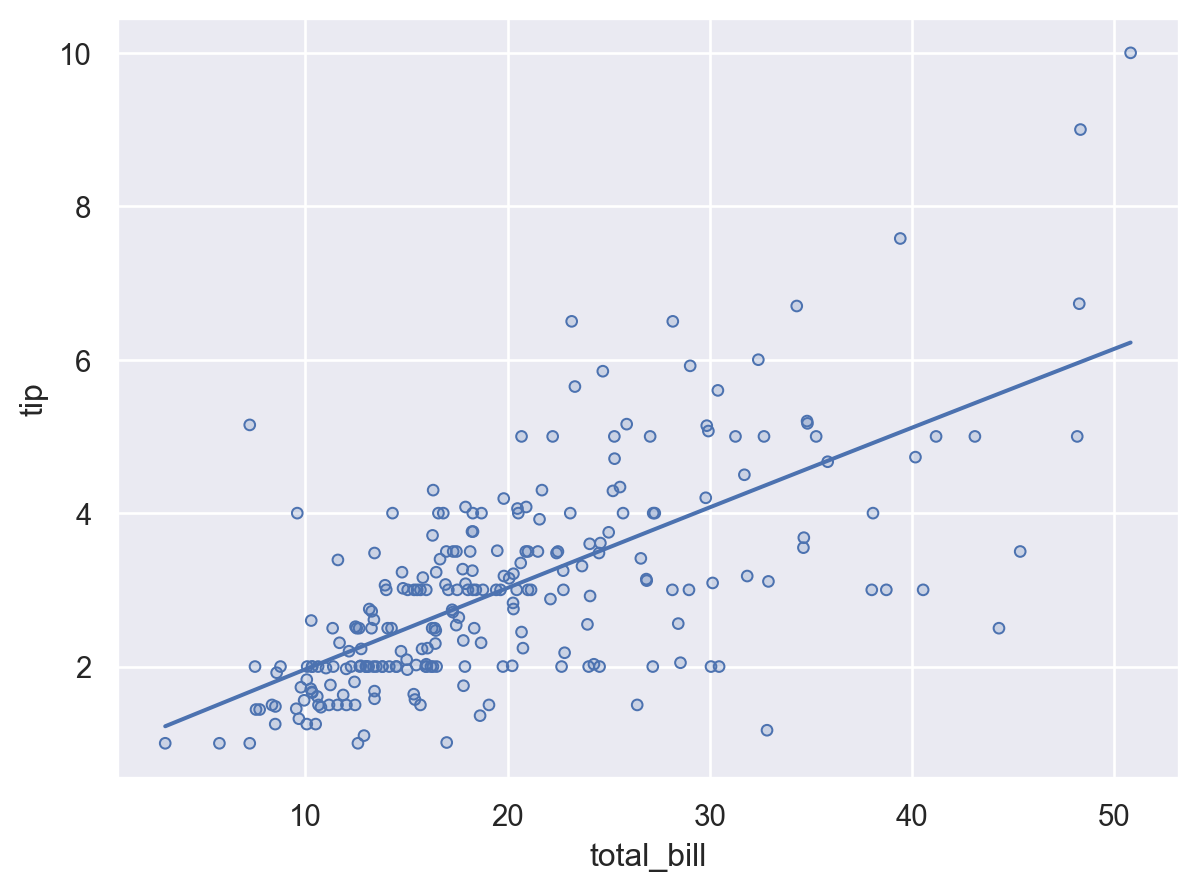

In [15]:
(
    so.Plot(propinas, x="total_bill", y="tip")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)